In [59]:
import torch
import numpy as np
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
temp = pq.read_table('cleaned_taxi_data.parquet')
temp = temp.to_pandas()

torch_temp = torch.tensor(temp.values)


In [9]:
temp

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PU_time_min,DO_day_in_june_2021,DO_time_hour,DO_time_min,avg_temp,avg_dew_pt,avg_humidity,avg_wind_speed,avg_pressure,total_precipitation
0,1,1.0,0.90,1.0,0,186,50,1,5.0,3.0,...,13,1,0,17,67.4,49.9,56.5,5.8,30.2,0.0
8,2,1.0,5.25,1.0,0,239,4,1,18.5,0.5,...,0,1,0,19,67.4,49.9,56.5,5.8,30.2,0.0
9,2,1.0,1.74,1.0,0,137,79,2,8.0,0.5,...,28,1,0,36,67.4,49.9,56.5,5.8,30.2,0.0
11,1,3.0,4.30,1.0,0,50,152,1,14.0,3.0,...,23,1,0,36,67.4,49.9,56.5,5.8,30.2,0.0
15,1,1.0,0.90,1.0,0,116,166,2,5.0,3.0,...,1,1,0,4,67.4,49.9,56.5,5.8,30.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710721,2,1.0,2.34,1.0,0,230,141,1,9.5,0.5,...,6,30,23,17,88.2,67.6,53.1,12.4,29.9,0.0
2710722,2,1.0,2.36,1.0,0,230,158,1,9.5,0.5,...,46,30,23,56,88.2,67.6,53.1,12.4,29.9,0.0
2710723,2,1.0,1.16,1.0,0,90,107,1,7.0,0.5,...,16,30,23,24,88.2,67.6,53.1,12.4,29.9,0.0
2710724,2,1.0,1.50,1.0,0,249,231,1,6.5,0.5,...,35,30,23,40,88.2,67.6,53.1,12.4,29.9,0.0


In [15]:
print(f' The shape of the data frame is {temp.shape}, indicating that there are 2,276,461 observations on 31 features.')

 The shape of the data frame is (2276461, 31), indicating that there are 2,276,461 observations on 31 features.


In [26]:
temp.describe()
#print(f'All features contain the same count (number) of observations, indicating there are no missing values.')

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PU_time_min,DO_day_in_june_2021,DO_time_hour,DO_time_min,avg_temp,avg_dew_pt,avg_humidity,avg_wind_speed,avg_pressure,total_precipitation
count,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,...,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06,2.276461e+06
mean,1.713920e+00,1.472616e+00,2.017087e+00,1.003058e+00,7.788844e-03,1.682210e+02,1.668505e+02,1.224111e+00,9.898870e+00,1.023657e+00,...,2.964435e+01,1.562462e+01,1.436345e+01,2.960596e+01,7.492776e+01,5.842747e+01,5.911936e+01,9.277435e+00,2.997130e+01,6.417241e-02
std,4.519271e-01,1.039033e+00,1.671309e+00,9.978257e-02,8.791008e-02,6.633780e+01,6.843555e+01,4.314849e-01,5.098086e+00,1.194539e+00,...,1.733007e+01,8.649838e+00,5.337169e+00,1.743247e+01,7.183517e+00,8.385969e+00,1.255664e+01,1.977477e+00,1.711145e-01,1.562487e-01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.480000e+01,3.780000e+01,3.030000e+01,5.100000e+00,2.970000e+01,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.020000e+00,1.000000e+00,0.000000e+00,1.250000e+02,1.140000e+02,1.000000e+00,6.500000e+00,0.000000e+00,...,1.500000e+01,8.000000e+00,1.100000e+01,1.400000e+01,6.860000e+01,5.250000e+01,5.130000e+01,8.000000e+00,2.990000e+01,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+00,1.000000e+00,0.000000e+00,1.630000e+02,1.630000e+02,1.000000e+00,8.500000e+00,5.000000e-01,...,3.000000e+01,1.600000e+01,1.500000e+01,3.000000e+01,7.290000e+01,5.980000e+01,5.760000e+01,9.500000e+00,2.990000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.520000e+00,1.000000e+00,0.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,1.200000e+01,2.500000e+00,...,4.500000e+01,2.300000e+01,1.800000e+01,4.500000e+01,8.120000e+01,6.710000e+01,6.910000e+01,1.070000e+01,3.010000e+01,0.000000e+00
max,2.000000e+00,7.000000e+00,9.990000e+01,6.000000e+00,1.000000e+00,2.630000e+02,2.630000e+02,4.000000e+00,3.000000e+02,4.550000e+01,...,5.900000e+01,3.100000e+01,2.300000e+01,5.900000e+01,8.970000e+01,6.870000e+01,8.390000e+01,1.290000e+01,3.030000e+01,6.700000e-01


In [24]:
df = temp

In [36]:
#df
#len(df.passenger_count.unique())

7

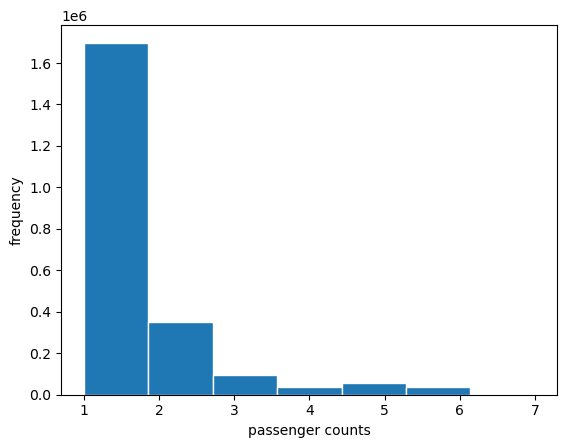

In [43]:
plt.hist(df['passenger_count'], bins = len(df.passenger_count.unique()), edgecolor='white')
plt.xlabel('passenger counts')
plt.ylabel('frequency')
plt.show()

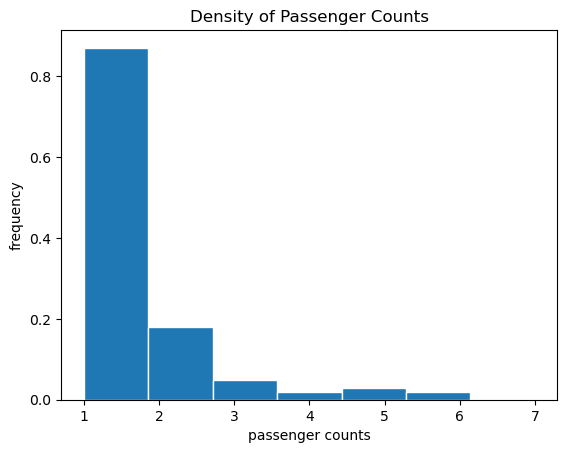

In [57]:
plt.hist(df['passenger_count'], bins = len(df.passenger_count.unique()), edgecolor='white',density=True)
plt.xlabel('passenger counts')
plt.ylabel('frequency')
plt.title('Density of Passenger Counts')
_ = plt.show()

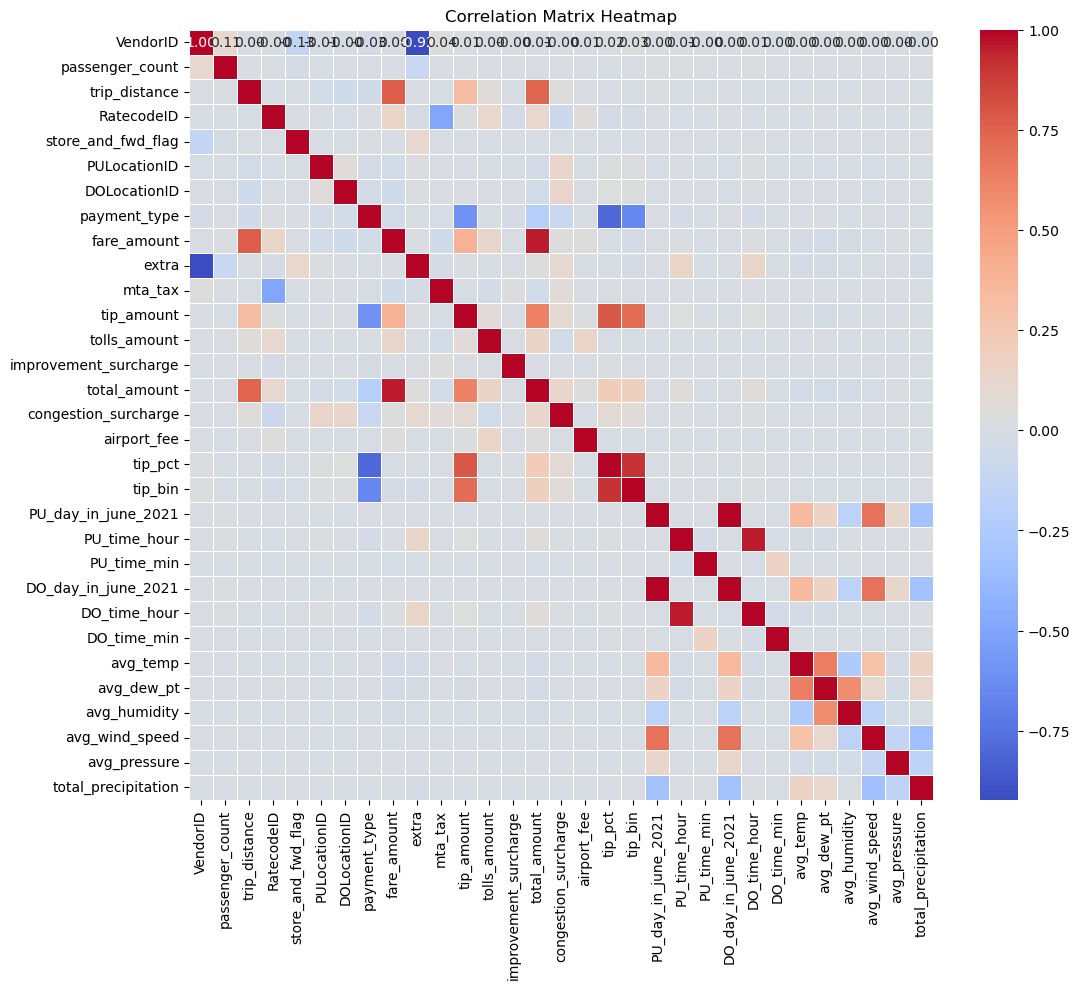

In [60]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
#fair_amount and total_amount highly correlated 
#PU_day_in_june_2021 and DO_day_in_june_2021
#PU_time_hour and DO_time_hour 
#trip_distance and fare_amount 
#trip_distance and total_amount
#total_amount and fare_amount 
#total_amount and tip_amount
#tip_pct and tip_amount 
#tip_bin and tip_amount
#avg_wind_speed and PU_day_in_june_2021
#avg_wind_speed and DO_day_in_june_2021


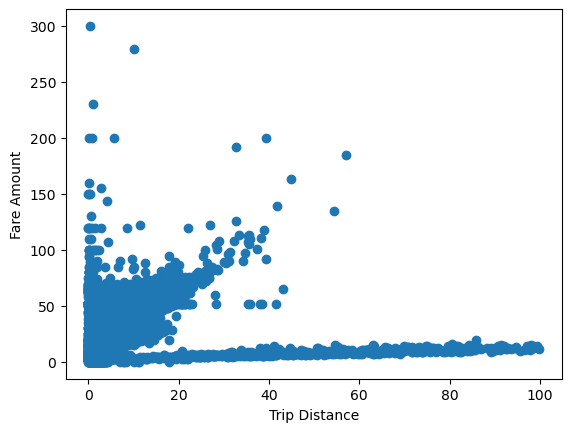

In [64]:
plt.scatter(df['trip_distance'],df['fare_amount'])
plt.ylabel('Fare Amount')
plt.xlabel('Trip Distance')
_ = plt.show()


In [72]:
#outliters! Trip distance .41, yet fare amount 300?
#Fare_amount =  The time-and-distance fare calculated by the meter.

df[df.fare_amount == 300]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PU_time_min,DO_day_in_june_2021,DO_time_hour,DO_time_min,avg_temp,avg_dew_pt,avg_humidity,avg_wind_speed,avg_pressure,total_precipitation
1078117,2,4.0,0.41,5.0,0,170,164,2,300.0,0.0,...,40,12,23,47,65.8,55.5,70.0,8.7,29.9,0.0


In [73]:
df[df.trip_distance == df.trip_distance.max()]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,PU_time_min,DO_day_in_june_2021,DO_time_hour,DO_time_min,avg_temp,avg_dew_pt,avg_humidity,avg_wind_speed,avg_pressure,total_precipitation
31247,1,1.0,99.9,1.0,0,230,125,2,11.5,2.5,...,46,1,13,59,67.4,49.9,56.5,5.8,30.2,0.0


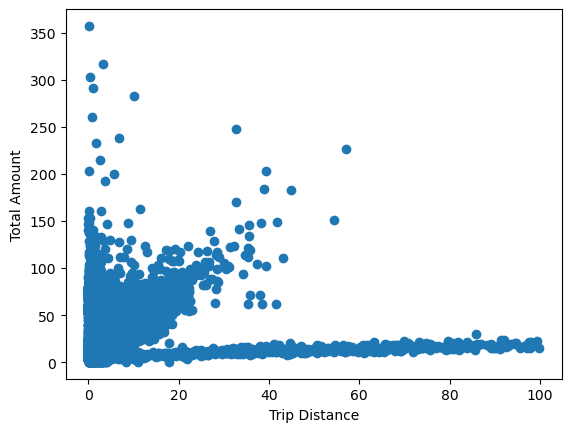

In [76]:
plt.scatter(df['trip_distance'],df['total_amount'])
plt.ylabel('Total Amount')
plt.xlabel('Trip Distance')
_ = plt.show()

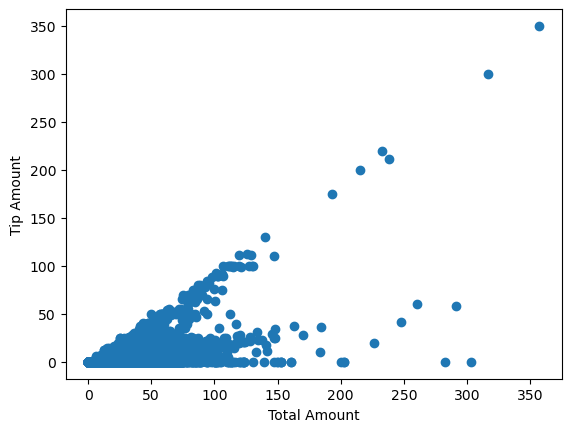

In [77]:
plt.scatter(df['total_amount'],df['tip_amount'])
plt.ylabel('Tip Amount')
plt.xlabel('Total Amount')
_ = plt.show()

In [116]:
df.tip_amount.max()
df[df.tip_amount == df.tip_amount.max()]
# df.row()
print(df.loc[2224614, ['trip_distance','total_amount','fare_amount','tip_amount','extra','mta_tax','congestion_surcharge']])
# df.loc[2224614, 'fare_amount']
# df.loc[2224614, 'trip_distance']
#357-3-350-1-.5-2.5

trip_distance             0.22
total_amount            357.30
fare_amount               3.00
tip_amount              350.00
extra                     1.00
mta_tax                   0.50
congestion_surcharge      2.50
Name: 2224614, dtype: float64


0.0

In [96]:
#df.tip_amount.max()

350.0

In [97]:
#df.total_amount.max()

357.3

ValueError: Value of 'lon' is not the name of a column in 'data_frame'. Expected one of ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'tip_pct', 'tip_bin', 'PU_day_in_june_2021', 'PU_time_hour', 'PU_time_min', 'DO_day_in_june_2021', 'DO_time_hour', 'DO_time_min', 'avg_temp', 'avg_dew_pt', 'avg_humidity', 'avg_wind_speed', 'avg_pressure', 'total_precipitation'] but received: DOLocationIS

In [120]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'tip_pct', 'tip_bin', 'PU_day_in_june_2021',
       'PU_time_hour', 'PU_time_min', 'DO_day_in_june_2021', 'DO_time_hour',
       'DO_time_min', 'avg_temp', 'avg_dew_pt', 'avg_humidity',
       'avg_wind_speed', 'avg_pressure', 'total_precipitation'],
      dtype='object')

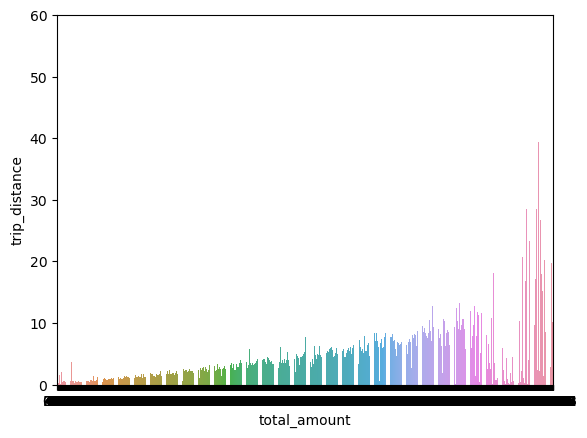

In [123]:
sns.barplot(
    data = df, x = 'total_amount', y = 'trip_distance',
    estimator = 'mean' , errorbar = None,
)
plt.show()

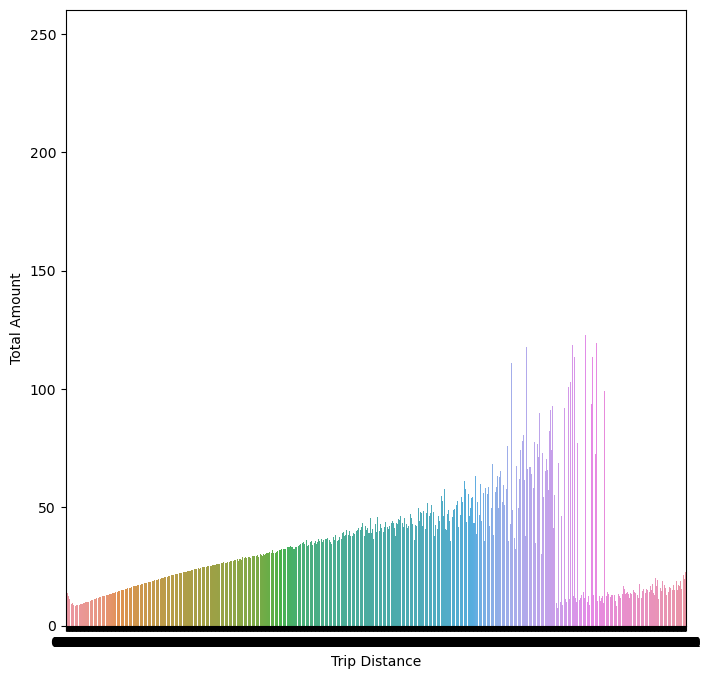

In [128]:
plt.figure(figsize=(8, 8))
sns.barplot(
    data = df, x = 'trip_distance', y = 'total_amount',
    estimator = 'mean' , errorbar = None,
)
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
average_daily_tips = (
    df
    .groupby('PU_day_in_june_2021')['tip_amount']
    .mean()
)
da

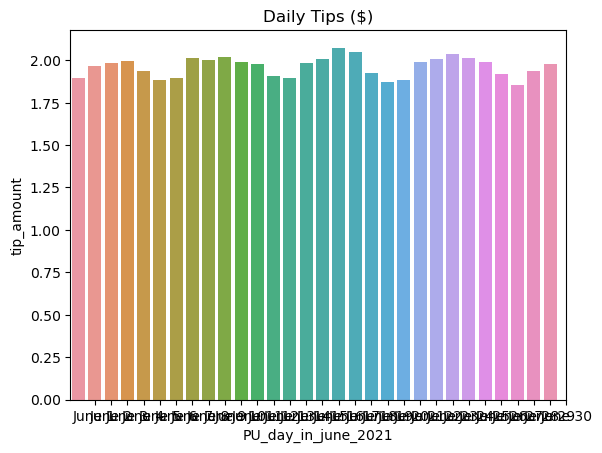

In [131]:


(
    sns.barplot(
        data=df, x="PU_day_in_june_2021", y="tip_amount",
        estimator="mean", errorbar=None,
    )
    .set(title="Mean Daily Tips ($)")
)

# Modifying x-axis labels to show corresponding dates
plt.xticks(ticks=df['PU_day_in_june_2021'].unique(), labels=["June {}".format(day) for day in df['PU_day_in_june_2021'].unique()])

plt.show()


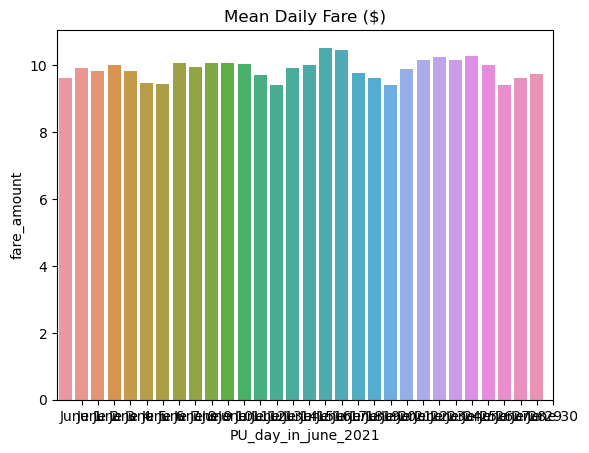

In [132]:
(
    sns.barplot(
        data=df, x="PU_day_in_june_2021", y="fare_amount",
        estimator="mean", errorbar=None,
    )
    .set(title="Mean Daily Fare ($)")
)

# Modifying x-axis labels to show corresponding dates
plt.xticks(ticks=df['PU_day_in_june_2021'].unique(), labels=["June {}".format(day) for day in df['PU_day_in_june_2021'].unique()])

plt.show()

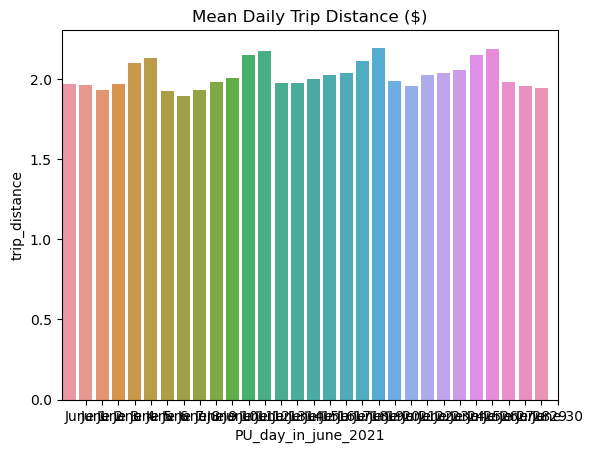

In [133]:
(
    sns.barplot(
        data=df, x="PU_day_in_june_2021", y="trip_distance",
        estimator="mean", errorbar=None,
    )
    .set(title="Mean Daily Trip Distance ($)")
)

# Modifying x-axis labels to show corresponding dates
plt.xticks(ticks=df['PU_day_in_june_2021'].unique(), labels=["June {}".format(day) for day in df['PU_day_in_june_2021'].unique()])

plt.show()